In [20]:
from torch import nn
import pandas as pd 
import torch 
from torch.utils.data import Dataset, DataLoader
import torch.optim as optim
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split

In [21]:
torch.manual_seed(42)

In [22]:
data = pd.read_csv("fmnist_small.csv")
data.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,9,0,0,0,0,0,0,0,0,0,...,0,7,0,50,205,196,213,165,0,0
1,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,142,142,142,21,0,3,0,0,0,0
3,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,213,203,174,151,188,10,0,0,0,0


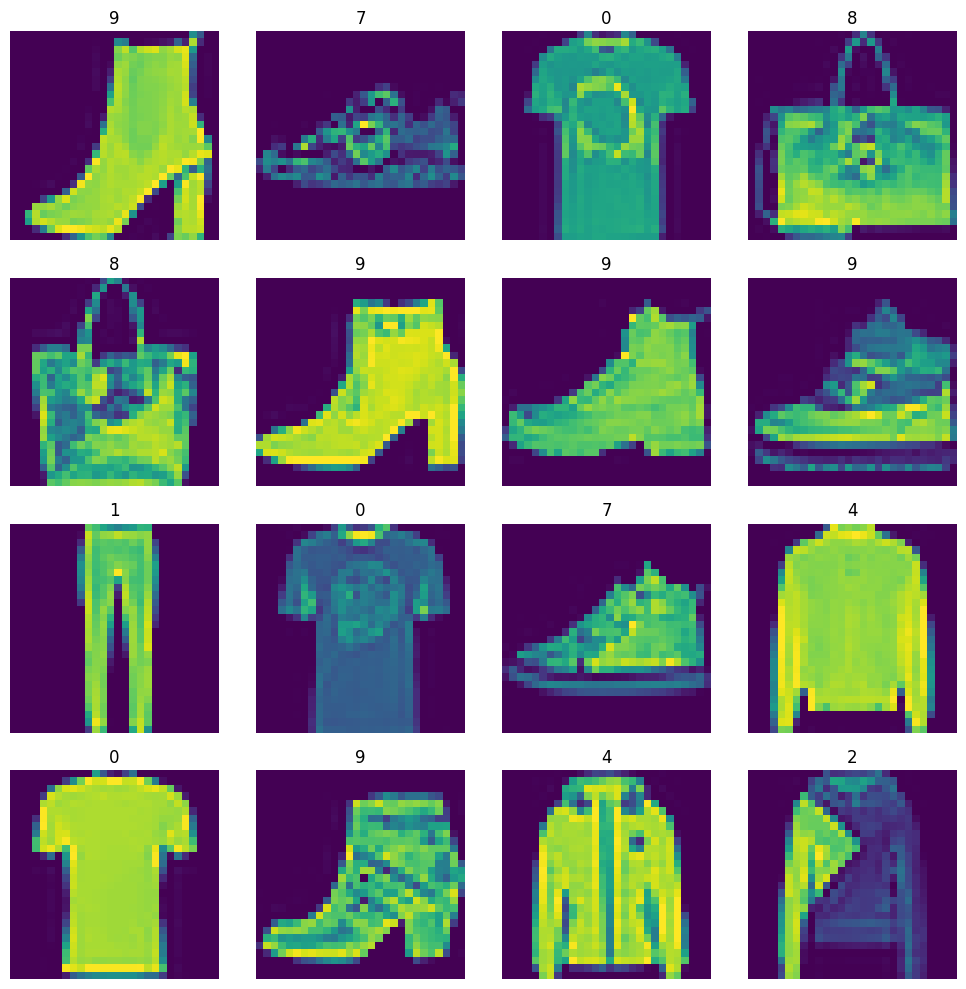

In [23]:

# 4*4 grid
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
# plotting the image
for i, ax in enumerate(axes.flat):
    img = data.iloc[i, 1:].values.reshape(28, 28)
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(data.iloc[i, 0])
plt.tight_layout()
plt.show()


In [24]:
X = data.iloc[:, 1:].values 
y = data.iloc[:, 0].values

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

* Creating a network

In [27]:
from torch._numpy import dtype
class FMNIST(Dataset):

    def __init__(self, feature, labels):
        self.feature = torch.tensor(feature, dtype=torch.float32) # expect float datatype
        self.labels = torch.tensor(labels, dtype=torch.long) # expect long datatype

    def __len__(self):
        return len(self.feature)

    def __getitem__(self, index):
        return self.feature[index], self.labels[index]

In [28]:
train_dataset = FMNIST(X_train_scaled, y_train)
len(train_dataset)

4800

In [29]:
test_dataset = FMNIST(X_test_scaled, y_test)
len(test_dataset)

1200

* Data Loader

In [39]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size = 32, shuffle = False)

* ANN

In [31]:
class MyNN(nn.Module):

    def __init__(self, num_features):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(num_features, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(p=0.3),
            nn.Linear(64, 10)
        )
        # nno need to apply sofmax at last bcs cross entropy have by default sofmax activatiobn function

    def forward(self, x):
        return self.model(x)

* learning rate and epochs

In [32]:
epochs = 400
learning_rate = 0.1

* Instatiate the model 

In [33]:
model = MyNN(X_train_scaled.shape[1])

* loss function and optimizer

In [34]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate)

* Training Loop

In [35]:

model.train()
for epoch in range(epochs):
    total_epoch_loss = 0
    for batch_feature, batch_label in train_loader:
        # forward pass
        outputs = model(batch_feature)
        # calculate loss
        loss = criterion(outputs, batch_label)
        # back pass
        optimizer.zero_grad()
        loss.backward()
        # update grads
        optimizer.step()

        total_epoch_loss += loss.item()

    avg_loss = total_epoch_loss / len(train_loader)
    print(f'Epoch: {epoch + 1}, Loss: {avg_loss:.4f}')


Epoch: 1, Loss: 0.9849
Epoch: 2, Loss: 0.6971
Epoch: 3, Loss: 0.6312
Epoch: 4, Loss: 0.5725
Epoch: 5, Loss: 0.5308
Epoch: 6, Loss: 0.5033
Epoch: 7, Loss: 0.4829
Epoch: 8, Loss: 0.4665
Epoch: 9, Loss: 0.4450
Epoch: 10, Loss: 0.4319
Epoch: 11, Loss: 0.4055
Epoch: 12, Loss: 0.3921
Epoch: 13, Loss: 0.3865
Epoch: 14, Loss: 0.3672
Epoch: 15, Loss: 0.3703
Epoch: 16, Loss: 0.3360
Epoch: 17, Loss: 0.3341
Epoch: 18, Loss: 0.3430
Epoch: 19, Loss: 0.3211
Epoch: 20, Loss: 0.3186
Epoch: 21, Loss: 0.3006
Epoch: 22, Loss: 0.3069
Epoch: 23, Loss: 0.2870
Epoch: 24, Loss: 0.2717
Epoch: 25, Loss: 0.2920
Epoch: 26, Loss: 0.2804
Epoch: 27, Loss: 0.2638
Epoch: 28, Loss: 0.2641
Epoch: 29, Loss: 0.2531
Epoch: 30, Loss: 0.2510
Epoch: 31, Loss: 0.2680
Epoch: 32, Loss: 0.2308
Epoch: 33, Loss: 0.2476
Epoch: 34, Loss: 0.2498
Epoch: 35, Loss: 0.2445
Epoch: 36, Loss: 0.2440
Epoch: 37, Loss: 0.2333
Epoch: 38, Loss: 0.2154
Epoch: 39, Loss: 0.2163
Epoch: 40, Loss: 0.2183
Epoch: 41, Loss: 0.2064
Epoch: 42, Loss: 0.2359
E

# Eval mode

In [36]:
model.eval()

MyNN(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [37]:
total = 0
correct = 0

with torch.no_grad():
    for batch_feature, batch_label in test_loader:
        outputs = model(batch_feature)
        _, predicted = torch.max(outputs, 1)
        total += batch_label.size(0)
        correct += (predicted == batch_label).sum().item()
print("Accuracy Score:",(correct / total)*100)

Accuracy Score: 84.25


In [38]:
total = 0
correct = 0

with torch.no_grad():
    for batch_feature, batch_label in train_loader:
        outputs = model(batch_feature)
        _, predicted = torch.max(outputs, 1)
        total += batch_label.size(0)
        correct += (predicted == batch_label).sum().item()
print("Accuracy Score:",(correct / total)*100)

Accuracy Score: 100.0
